In [15]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

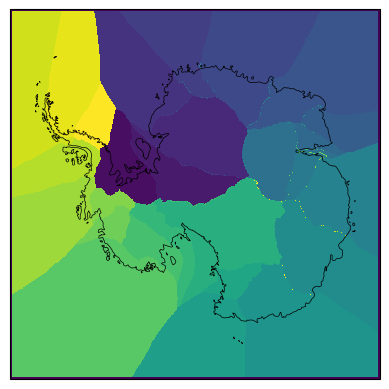

In [16]:
mask = xr.open_dataset('/Users/jonniebarnsley/data/phd/masks/zwally_basins_extended_16km.nc')

from libs.customplots import spatialPlot
spatialPlot(mask.basin)

In [19]:
from libs.GoelzerSLC import getEnsembleSLC
from pathlib import Path

thk = Path('/Users/jonniebarnsley/data/phd/overshoot/thickness')
zb = Path('/Users/jonniebarnsley/data/phd/overshoot/Z_base')
mask = Path('/Users/jonniebarnsley/data/phd/masks/zwally_basins_extended_8km.nc')

test = getEnsembleSLC(thk, zb)

Thickness                                                    Z_base
overshoot_PIGL5th_CESM2-WACCM_J300_thickness_0lev.nc         overshoot_PIGL5th_CESM2-WACCM_J300_Z_base_0lev.nc
overshoot_PIGL5th_CESM2-WACCM_J50_thickness_0lev.nc          overshoot_PIGL5th_CESM2-WACCM_J50_Z_base_0lev.nc
overshoot_PIGL5th_CESM2-WACCM_WT_thickness_0lev.nc           overshoot_PIGL5th_CESM2-WACCM_WT_Z_base_0lev.nc
overshoot_meanAnt_CESM2-WACCM_J300_thickness_0lev.nc         overshoot_meanAnt_CESM2-WACCM_J300_Z_base_0lev.nc
overshoot_meanAnt_CESM2-WACCM_J50_thickness_0lev.nc          overshoot_meanAnt_CESM2-WACCM_J50_Z_base_0lev.nc
overshoot_meanAnt_CESM2-WACCM_WT_thickness_0lev.nc           overshoot_meanAnt_CESM2-WACCM_WT_Z_base_0lev.nc


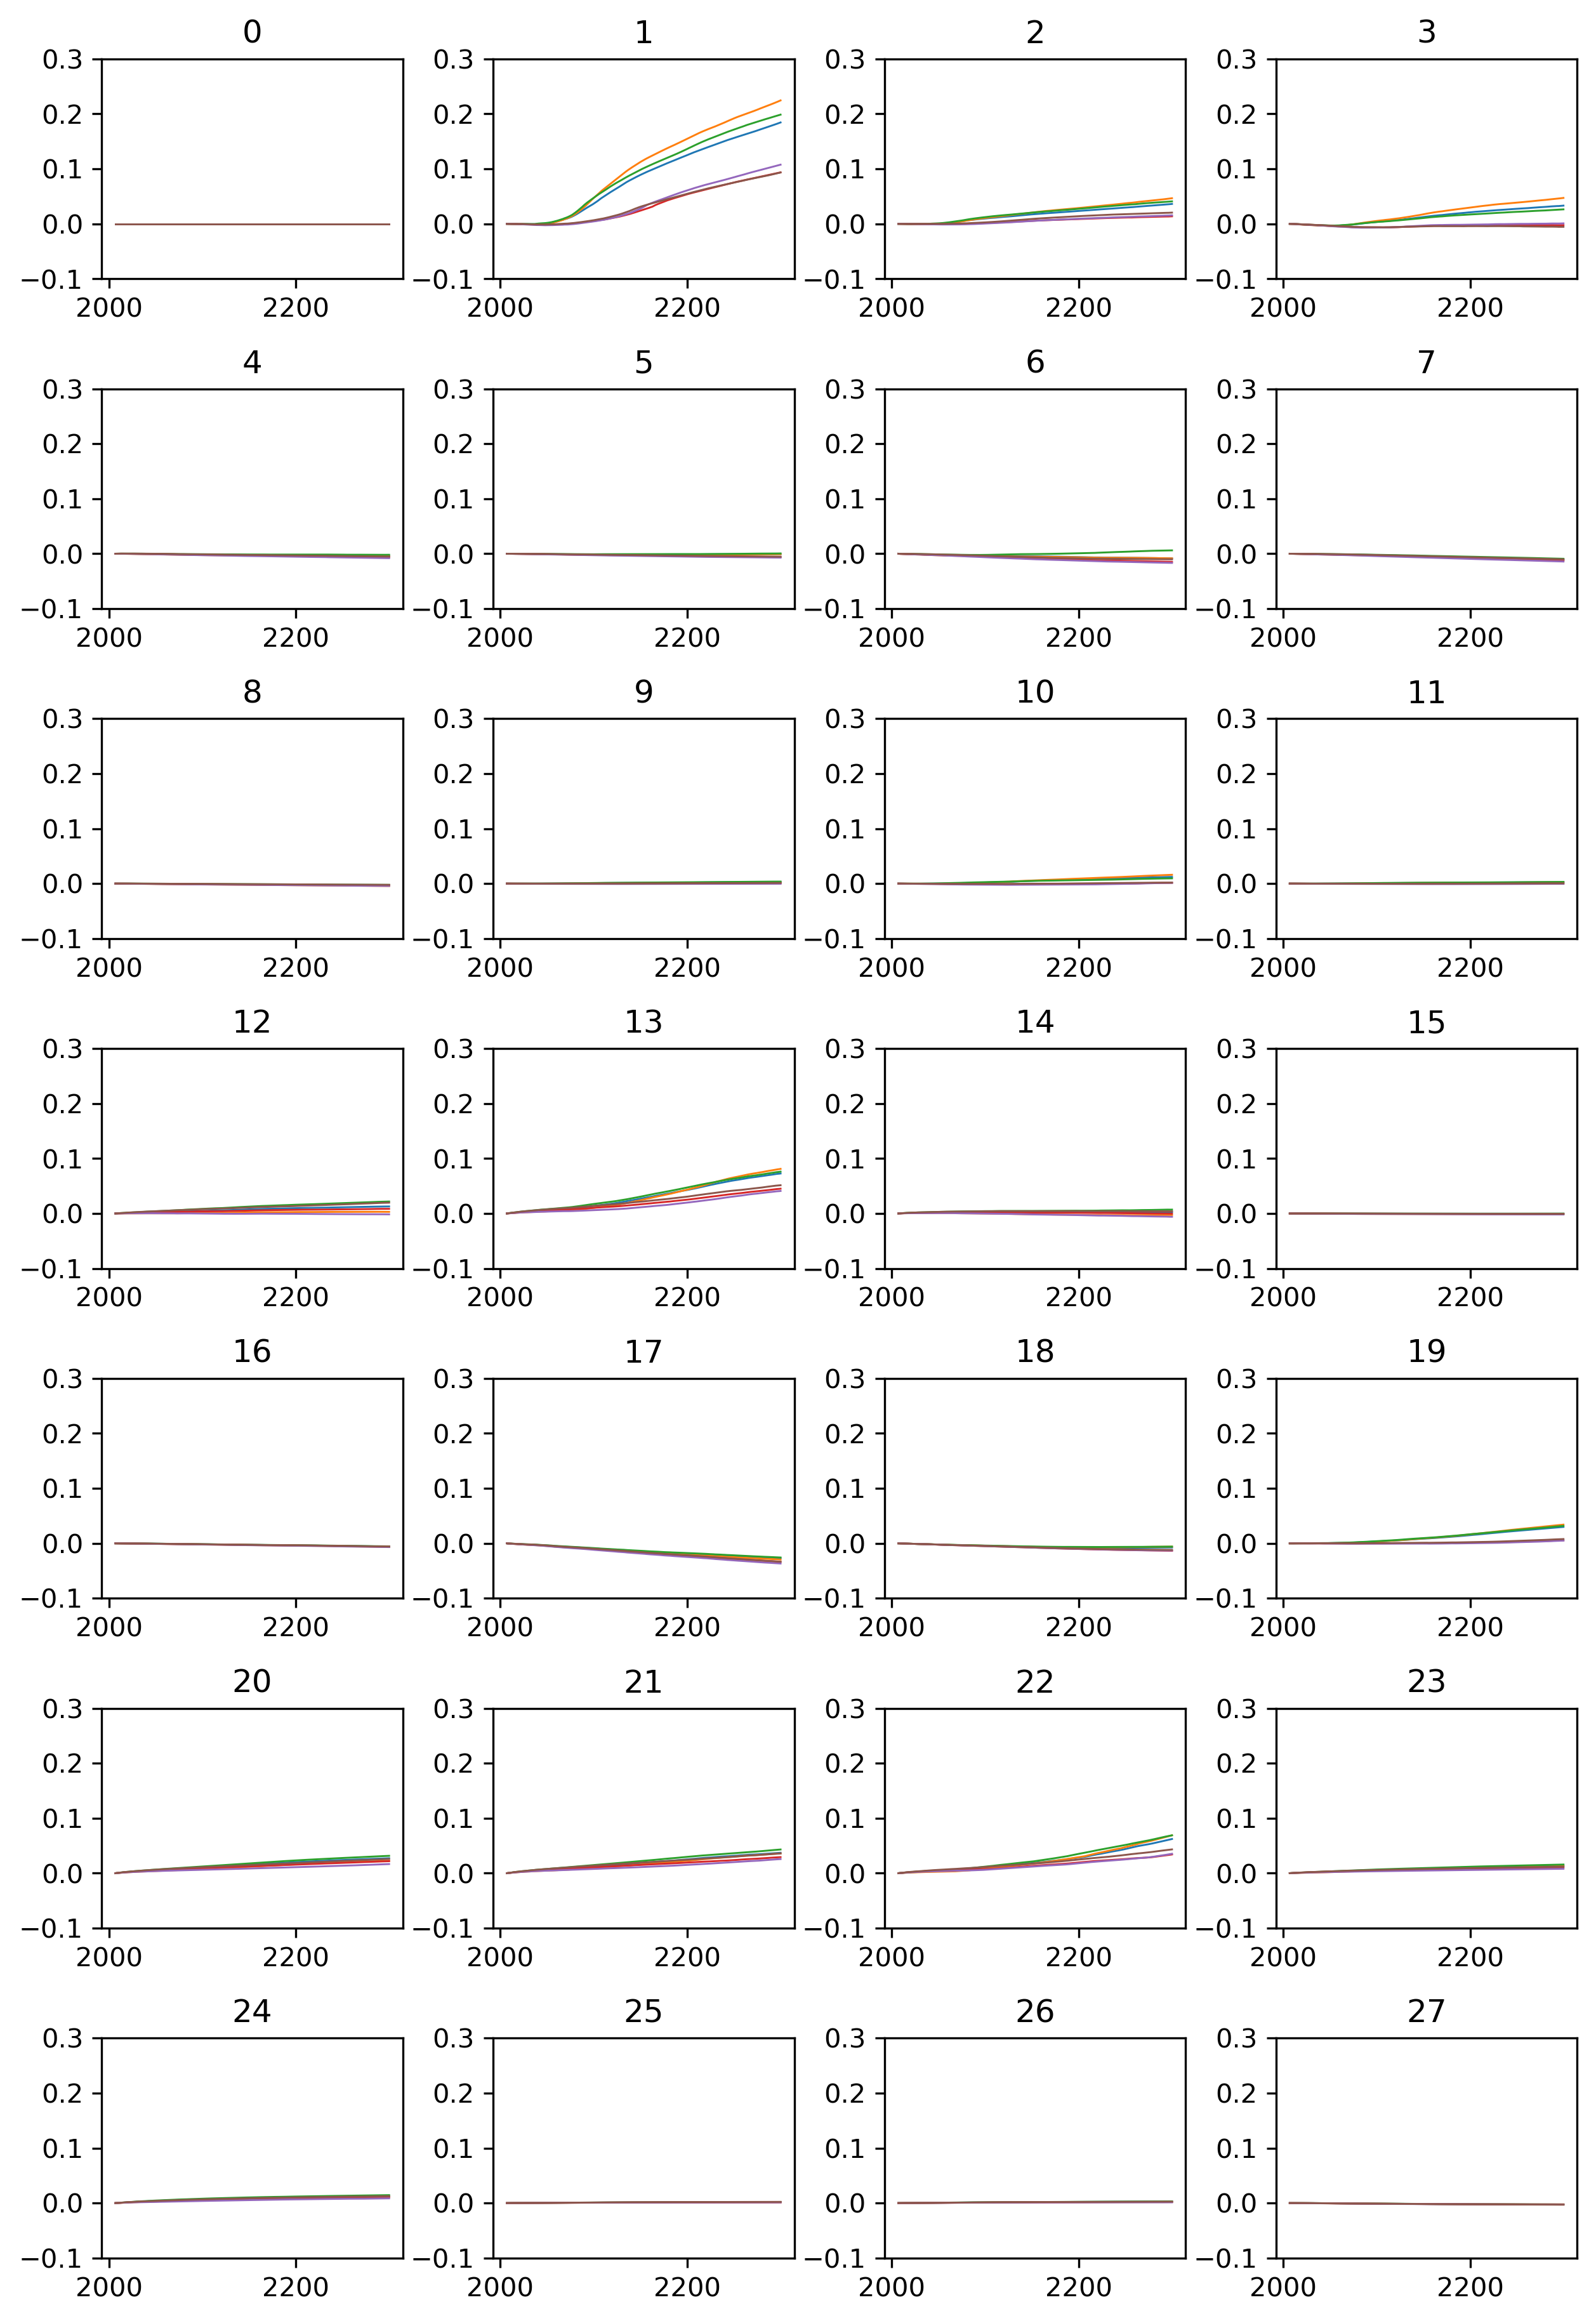

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=4, nrows=7, dpi=300, figsize = (10, 15))

for ax, basin in zip(axes.flatten(), test.basin):
    for run in test.run:
        ts = test.sel(run=run, basin=basin)
        ax.plot(test.time, ts, lw=0.7)
        ax.set_ylim([-0.1, 0.3])
    ax.set_title(basin.values)

fig.subplots_adjust(hspace=0.5, wspace=0.3)

In [22]:
import xarray as xr
with xr.open_dataset(thk / 'overshoot_meanAnt_CESM2-WACCM_J50_thickness_0lev.nc') as file:
    thickness = file.thickness
with xr.open_dataset(zb / 'overshoot_meanAnt_CESM2-WACCM_J50_Z_base_0lev.nc') as file:
    z_base = file.Z_base

from libs.GoelzerSLC import GoelzerSLC

spatialdata = GoelzerSLC(thickness, z_base)

In [62]:
all(thickness['x'] == z_base['x'])

True

In [5]:
def c(b: int):
    print(b)

c(float(1))

1.0


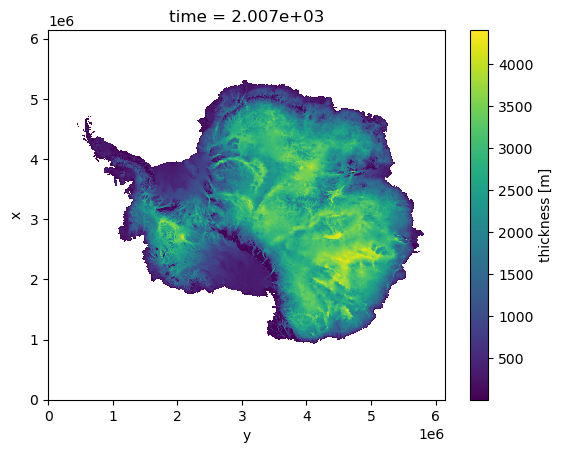

In [49]:
thickness.isel(time=0).plot()

In [9]:
df = test.sel(basin=1).to_pandas()
df

time,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,...,2291.0,2292.0,2293.0,2294.0,2295.0,2296.0,2297.0,2298.0,2299.0,2300.0
run,,,,,,,,,,,,,,,,,,,,,
1,0.0,-0.000032,-0.000085,-0.000125,-0.000135,-0.000158,-0.000231,-0.000298,-0.000316,-0.000293,...,0.179034,0.179632,0.180228,0.180790,0.181366,0.181959,0.182554,0.183179,0.183811,0.184439
2,0.0,-0.000049,-0.000120,-0.000179,-0.000202,-0.000242,-0.000329,-0.000411,-0.000445,-0.000439,...,0.218184,0.218860,0.219548,0.220220,0.220905,0.221616,0.222321,0.223053,0.223791,0.224547
3,0.0,-0.000032,-0.000076,-0.000092,-0.000066,-0.000066,-0.000116,-0.000161,-0.000159,-0.000120,...,0.194116,0.194641,0.195157,0.195634,0.196113,0.196603,0.197094,0.197614,0.198141,0.198657
4,0.0,-0.000032,-0.000075,-0.000137,-0.000142,-0.000125,-0.000120,-0.000118,-0.000127,-0.000138,...,0.090304,0.090686,0.091065,0.091418,0.091772,0.092136,0.092501,0.092896,0.093292,0.093685
5,0.0,-0.000049,-0.000103,-0.000181,-0.000189,-0.000191,-0.000216,-0.000229,-0.000258,-0.000290,...,0.103697,0.104160,0.104604,0.105023,0.105444,0.105872,0.106299,0.106755,0.107201,0.107645
6,0.0,-0.000032,-0.000093,-0.000147,-0.000132,-0.000106,-0.000098,-0.000083,-0.000074,-0.000065,...,0.089814,0.090214,0.090608,0.090984,0.091363,0.091748,0.092134,0.092558,0.092983,0.093408


In [10]:
df.columns = list(range(2007, 2301))
df.index = range(6)
df

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,0.0,-0.000032,-0.000085,-0.000125,-0.000135,-0.000158,-0.000231,-0.000298,-0.000316,-0.000293,...,0.179034,0.179632,0.180228,0.180790,0.181366,0.181959,0.182554,0.183179,0.183811,0.184439
1,0.0,-0.000049,-0.000120,-0.000179,-0.000202,-0.000242,-0.000329,-0.000411,-0.000445,-0.000439,...,0.218184,0.218860,0.219548,0.220220,0.220905,0.221616,0.222321,0.223053,0.223791,0.224547
2,0.0,-0.000032,-0.000076,-0.000092,-0.000066,-0.000066,-0.000116,-0.000161,-0.000159,-0.000120,...,0.194116,0.194641,0.195157,0.195634,0.196113,0.196603,0.197094,0.197614,0.198141,0.198657
3,0.0,-0.000032,-0.000075,-0.000137,-0.000142,-0.000125,-0.000120,-0.000118,-0.000127,-0.000138,...,0.090304,0.090686,0.091065,0.091418,0.091772,0.092136,0.092501,0.092896,0.093292,0.093685
4,0.0,-0.000049,-0.000103,-0.000181,-0.000189,-0.000191,-0.000216,-0.000229,-0.000258,-0.000290,...,0.103697,0.104160,0.104604,0.105023,0.105444,0.105872,0.106299,0.106755,0.107201,0.107645
5,0.0,-0.000032,-0.000093,-0.000147,-0.000132,-0.000106,-0.000098,-0.000083,-0.000074,-0.000065,...,0.089814,0.090214,0.090608,0.090984,0.091363,0.091748,0.092134,0.092558,0.092983,0.093408


In [11]:
filenames = [run.name for run in sorted(thk.iterdir())]

data = [filename.split('_')[:4] for filename in filenames]
runInfo = pd.DataFrame(data, columns=['scenario', 'gamma', 'gcm', 'slidinglaw'])
new_order = ['gamma', 'scenario', 'gcm', 'slidinglaw']
runInfo = runInfo[new_order]
runInfo['scenario'] = runInfo['scenario'].replace('overshoot', 'ssp534-over')
runInfo['gamma'] = runInfo['gamma'].replace('PIGL5th', 'PIG5')
# Display the resulting dataframe
runInfo


,gamma,scenario,gcm,slidinglaw
0,PIG5,ssp534-over,CESM2-WACCM,J300
1,PIG5,ssp534-over,CESM2-WACCM,J50
2,PIG5,ssp534-over,CESM2-WACCM,WT
3,meanAnt,ssp534-over,CESM2-WACCM,J300
4,meanAnt,ssp534-over,CESM2-WACCM,J50
5,meanAnt,ssp534-over,CESM2-WACCM,WT


Text(0.5, 1.0, 'Overshoot scenario Antarctic sea level contribution')

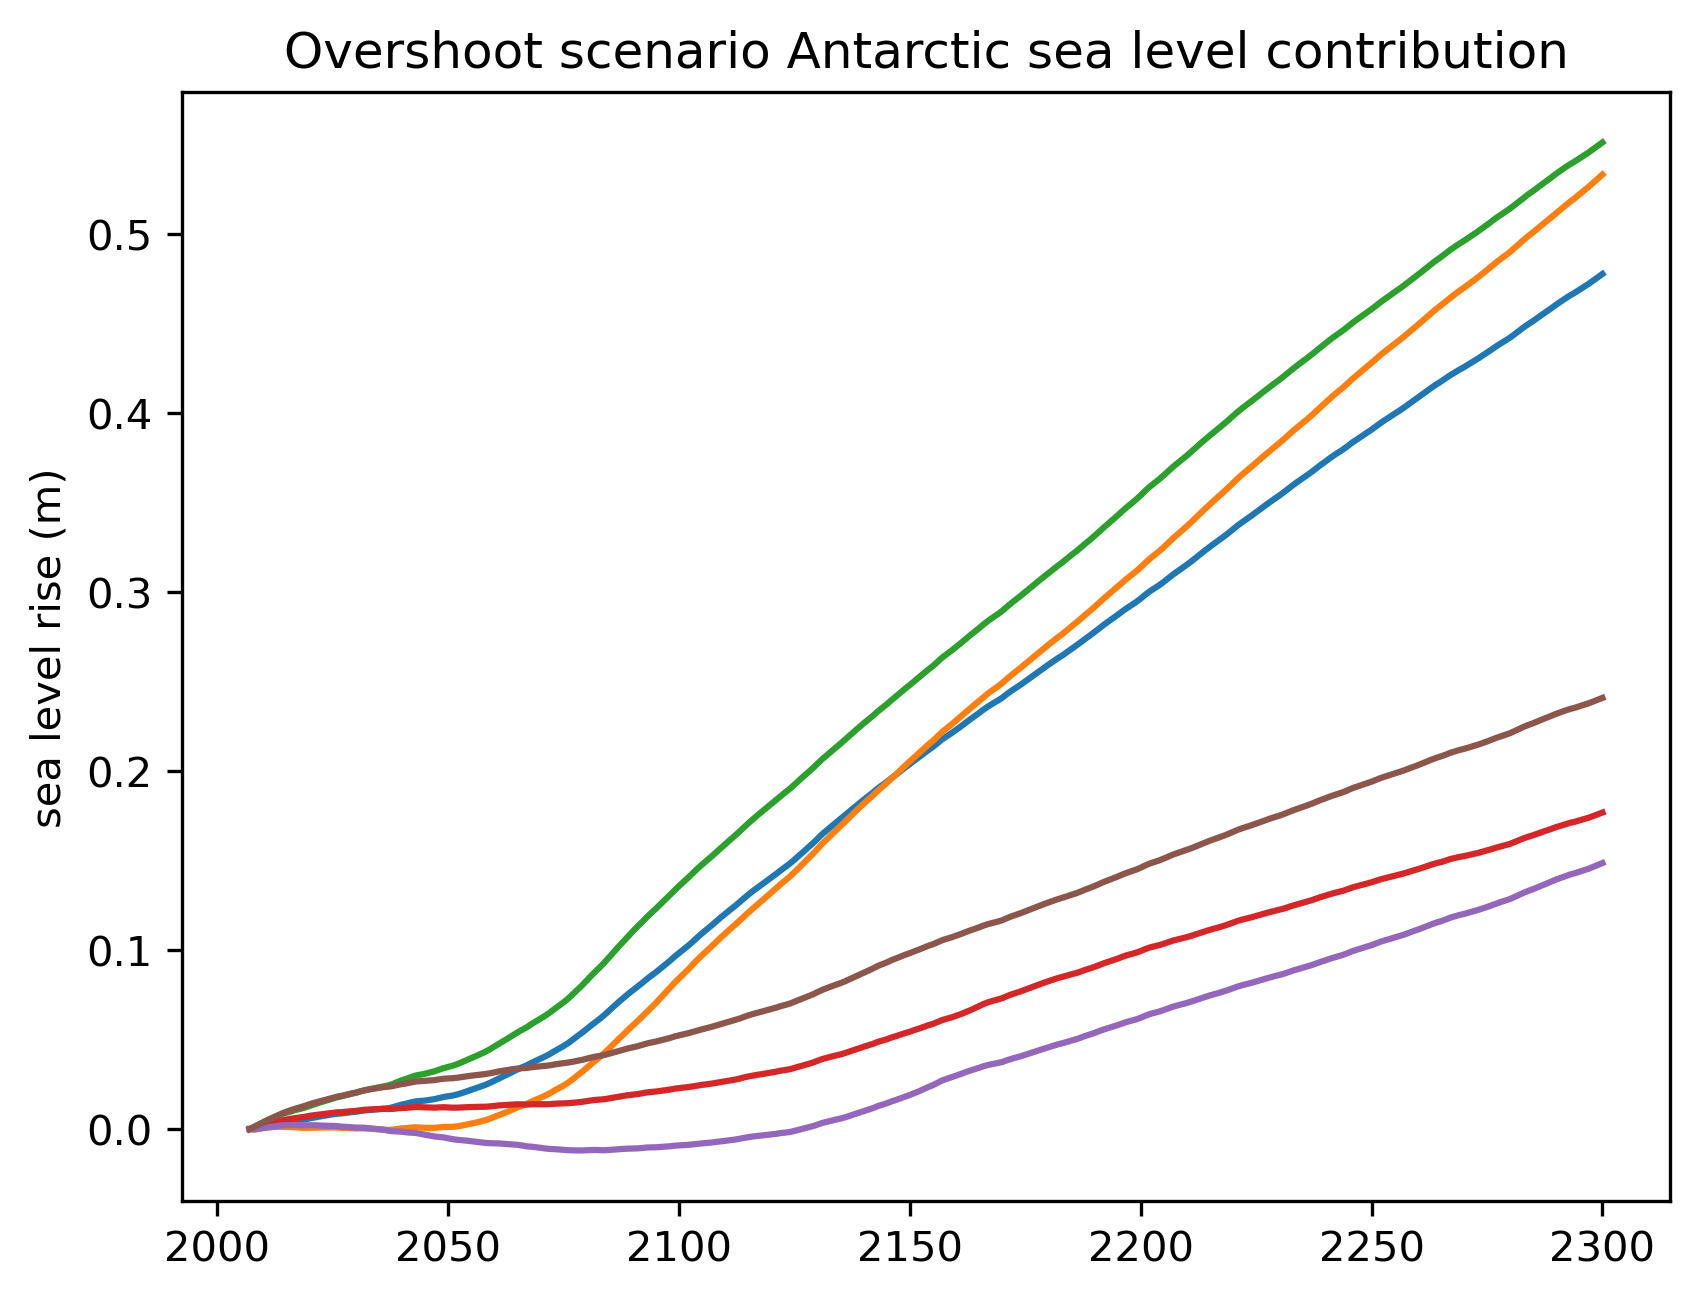

In [27]:
fig, ax = plt.subplots(dpi=300)

total = np.zeros([6, 294])
for basinID in range(1, 28):
    total += test.sel(basin=basinID)
for runNum in range(1, 7):
    ts = total.sel(run=runNum)
    ax.plot(total.time, ts)

ax.set_ylabel('sea level rise (m)')
ax.set_title('Overshoot scenario Antarctic sea level contribution')

In [21]:
total.to_pandas()

time,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,...,2291.0,2292.0,2293.0,2294.0,2295.0,2296.0,2297.0,2298.0,2299.0,2300.0
run,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000327,0.001099,0.001802,0.002519,0.003108,0.003640,0.004076,0.004399,0.004745,...,0.462383,0.464138,0.465774,0.467261,0.468937,0.470555,0.472210,0.474079,0.475886,0.477744
2,0.0,-0.000239,0.000216,0.000579,0.000905,0.001094,0.001221,0.001251,0.001172,0.001115,...,0.513899,0.516028,0.518105,0.520066,0.522223,0.524319,0.526436,0.528745,0.530987,0.533298
3,0.0,0.001274,0.002661,0.003967,0.005240,0.006343,0.007389,0.008341,0.009147,0.009968,...,0.535606,0.537418,0.539087,0.540597,0.542293,0.543932,0.545634,0.547541,0.549372,0.551236
4,0.0,0.000327,0.001125,0.001838,0.002623,0.003342,0.004101,0.004818,0.005338,0.005805,...,0.169507,0.170331,0.171099,0.171699,0.172457,0.173180,0.173934,0.174871,0.175851,0.176859
5,0.0,-0.000239,0.000251,0.000637,0.001054,0.001370,0.001726,0.002040,0.002146,0.002205,...,0.140385,0.141357,0.142225,0.142920,0.143784,0.144601,0.145454,0.146495,0.147562,0.148638
6,0.0,0.001274,0.002601,0.003836,0.005132,0.006314,0.007563,0.008757,0.009736,0.010645,...,0.232946,0.233871,0.234700,0.235372,0.236216,0.237028,0.237861,0.238867,0.239875,0.240891


In [13]:
from xarray import DataArray

path = Path('/Users/jonniebarnsley/code/phd/data/mira/overshoot_v1')
def makeCSV(da: DataArray, basinID: int) -> None:

    df = da.to_pandas()
    df.index = range(6)
    df.columns = range(2007, 2301)
    df = pd.concat([runInfo, df], axis=1)
    filename = f'ZWALLY{basinID:02}_v3'
    df.to_csv(path / filename)

total = np.zeros([6, 294]) # [size of ensemble = 6, timeslices in each run = 294 (2007 - 2300)]
for basinID in range(1, 28):
    total += test.sel(basin=basinID)
    da = test.sel(basin=basinID)
    makeCSV(da, basinID)
makeCSV(total, 0)

In [5]:
test.name = 'test'
test.name

'test'

In [11]:
import xarray as xr
file = xr.open_dataset(mask)
file

<xarray.Dataset>
Dimensions:  (y: 768, x: 768)
Coordinates:
  * x        (x) float64 4e+03 1.2e+04 2e+04 ... 6.124e+06 6.132e+06 6.14e+06
  * y        (y) float64 4e+03 1.2e+04 2e+04 ... 6.124e+06 6.132e+06 6.14e+06
Data variables:
    crs      int32 ...
    basin    (y, x) float64 ...
Attributes:
    Conventions:         CF-1.7
    component_0:         basin
    filetype:            VanillaAMRFileType
    crs_EPSG:            0
    num_components:      1
    num_levels:          1
    crs_origin_x:        0.0
    crs_origin_y:        0.0
    dx:                  1000.0
    Conversion_history:  Carried out by J R Barnsley on login2.arc3.leeds.ac....

In [13]:
test.to_netcdf('test.nc')

In [14]:
file = xr.open_dataset('test.nc')
file

<xarray.Dataset>
Dimensions:  (time: 294, basin: 28, run: 6)
Coordinates:
  * time     (time) float64 2.007e+03 2.008e+03 2.009e+03 ... 2.299e+03 2.3e+03
  * basin    (basin) int64 0 1 2 3 4 5 6 7 8 9 ... 18 19 20 21 22 23 24 25 26 27
  * run      (run) int64 1 2 3 4 5 6
Data variables:
    test     (run, basin, time) float64 ...

In [48]:
test

<xarray.DataArray (run: 6, basin: 28, time: 294)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.15255239e-05, -8.54715321e-05, ...,
          1.83178896e-01,  1.83810579e-01,  1.84438899e-01],
        [ 0.00000000e+00, -8.70010278e-06, -2.90842282e-05, ...,
          3.59096343e-02,  3.60806265e-02,  3.62474277e-02],
        ...,
        [ 0.00000000e+00,  4.49995282e-05,  8.34182746e-05, ...,
          1.75244091e-03,  1.75319360e-03,  1.75396604e-03],
        [ 0.00000000e+00,  2.92201683e-05,  3.93378061e-05, ...,
          2.70614807e-03,  2.69135568e-03,  2.71358926e-03],
        [ 0.00000000e+00, -3.64693381e-07, -3.17165017e-06, ...,
         -2.43389578e-03, -2.43971980e-03, -2.44163809e-03]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -4.85320442e-05, -1.20232603e-04, ...,
          2.23052918e-01,  2.23790767e-01,  2.24546732e-01],
        [ 0.00000000e+00, -2.26866900e-05, -5.23610282e-05, ...,
          4.61304971e-02,  4.63693272e-02,  4.66045529e-02],
...
        [ 0.00000000e+00,  4.53732369e-05,  8.28058321e-05, ...,
          1.17962583e-03,  1.17967483e-03,  1.17970763e-03],
        [ 0.00000000e+00,  2.33523021e-05,  3.33031731e-05, ...,
          1.35948396e-03,  1.36004737e-03,  1.36316828e-03],
        [ 0.00000000e+00, -5.43694720e-06, -1.04875486e-05, ...,
         -2.55833968e-03, -2.56478147e-03, -2.56930430e-03]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.21717648e-05, -9.32315302e-05, ...,
          9.25575328e-02,  9.29828200e-02,  9.34076315e-02],
        [ 0.00000000e+00,  2.04754760e-05,  1.93931908e-05, ...,
          2.02990354e-02,  2.03713169e-02,  2.04432056e-02],
        ...,
        [ 0.00000000e+00,  5.01147131e-05,  9.09905862e-05, ...,
          2.22585263e-03,  2.22768648e-03,  2.22944548e-03],
        [ 0.00000000e+00,  5.93900796e-05,  7.98241618e-05, ...,
          2.60129665e-03,  2.60359532e-03,  2.60862247e-03],
        [ 0.00000000e+00,  5.67761266e-06,  6.27666021e-06, ...,
         -2.89592290e-03, -2.90468416e-03, -2.91110634e-03]]])
Coordinates:
  * time     (time) float64 2.007e+03 2.008e+03 2.009e+03 ... 2.299e+03 2.3e+03
  * basin    (basin) int64 0 1 2 3 4 5 6 7 8 9 ... 18 19 20 21 22 23 24 25 26 27
  * run      (run) int64 1 2 3 4 5 6

In [49]:
test.rename({'a': 'b'})

ValueError: cannot rename 'a' because it is not a variable or dimension in this dataset

In [10]:
one = {1}.intersection((1, 2))
two = one.pop()
two

1

In [13]:
{3, 2}.pop()

2

In [16]:
d = {1: 2, 3: 4}
d.items()

dict_items([(1, 2), (3, 4)])

In [22]:
import xarray as xr
a = xr.open_dataset(mask)
a.rename({'x': 'xs'})

<xarray.Dataset>
Dimensions:  (y: 768, xs: 768)
Coordinates:
  * xs       (xs) float64 4e+03 1.2e+04 2e+04 ... 6.124e+06 6.132e+06 6.14e+06
  * y        (y) float64 4e+03 1.2e+04 2e+04 ... 6.124e+06 6.132e+06 6.14e+06
Data variables:
    crs      int32 ...
    basin    (y, xs) float64 ...
Attributes:
    Conventions:         CF-1.7
    component_0:         basin
    filetype:            VanillaAMRFileType
    crs_EPSG:            0
    num_components:      1
    num_levels:          1
    crs_origin_x:        0.0
    crs_origin_y:        0.0
    dx:                  1000.0
    Conversion_history:  Carried out by J R Barnsley on login2.arc3.leeds.ac....

In [29]:
'basin' not in a.variables

False

In [8]:
from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
test = Path('/Users/jonniebarnsley/data/phd/Control/test.nc')
file = xr.open_dataset(test)
file
# slc = file.slc

# fig, ax = plt.subplots()

# years = np.arange(30, 10_000, 30)
# for run in file.run:
#     ts = slc.sel(run=run)
#     ax.plot(years, ts, lw=0.5, alpha=0.3)

<xarray.Dataset>
Dimensions:  (time: 333, basin: 28, run: 120)
Coordinates:
  * time     (time) int64 30 60 90 120 150 180 ... 9840 9870 9900 9930 9960 9990
  * basin    (basin) int64 0 1 2 3 4 5 6 7 8 9 ... 18 19 20 21 22 23 24 25 26 27
  * run      (run) int64 1 2 3 4 5 6 7 8 9 ... 113 114 115 116 117 118 119 120
Data variables:
    slc      (run, basin, time) float64 ...

In [7]:
file = xr.open_dataset('/Users/jonniebarnsley/code/phd/data/netcdfs/combined_2007_2100.nc')
file

<xarray.Dataset>
Dimensions:                       (time: 94, x: 768, y: 768)
Coordinates:
  * time                          (time) float64 2.007e+03 2.008e+03 ... 2.1e+03
  * x                             (x) float64 -3.068e+06 -3.06e+06 ... 3.068e+06
  * y                             (y) float64 -3.068e+06 -3.06e+06 ... 3.068e+06
Data variables: (12/30)
    crs                           (time) int32 ...
    thickness                     (time, y, x) float64 ...
    xVel                          (time, y, x) float64 ...
    yVel                          (time, y, x) float64 ...
    zVel                          (time, y, x) float64 ...
    Z_surface                     (time, y, x) float64 ...
    ...                            ...
    surfaceThicknessSource        (time, y, x) float64 ...
    calvingFlux                   (time, y, x) float64 ...
    calvingRate                   (time, y, x) float64 ...
    waterDepth                    (time, y, x) float64 ...
    sTemp                         (time, y, x) float64 ...
    bTemp                         (time, y, x) float64 ...
Attributes: (12/54)
    Conventions:             CF-1.7
    component_0:             thickness
    component_1:             xVel
    component_10:            xbVel
    component_11:            ybVel
    component_12:            zbVel
    ...                      ...
    density_of_ice:          917.0
    dt:                      1e+20
    seconds_per_unit_time:   31556926.0
    time:                    2007.0
    dx:                      8000.0
    Conversion_history:      slc removed this feature to see if it was causin...

In [8]:
thk = file.thickness
z_base = file.Z_base
thk

<xarray.DataArray 'thickness' (time: 94, y: 768, x: 768)>
[55443456 values with dtype=float64]
Coordinates:
  * time     (time) float64 2.007e+03 2.008e+03 2.009e+03 ... 2.099e+03 2.1e+03
  * x        (x) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
  * y        (y) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
Attributes:
    grid_mapping:   crs
    standard_name:  thickness

In [2]:
from libs.GoelzerSLC import getEnsembleSLC, GoelzerSLC
from pathlib import Path

thkPath = Path('/Users/jonniebarnsley/code/phd/data/netcdfs')
zbPath = Path('/Users/jonniebarnsley/code/phd/data/netcdfs')
maskPath = Path('/Users/jonniebarnsley/data/phd/masks/zwally_basins_extended_8km.nc')

# slc = getEnsembleSLC(thkPath=thkPath, zbPath=zbPath, maskPath=maskPath)
# slc

In [3]:
thk = xr.open_dataset(thkPath / 'combined_2007_2100.nc')
zb = xr.open_dataset(zbPath / 'combined_2007_2100.nc')

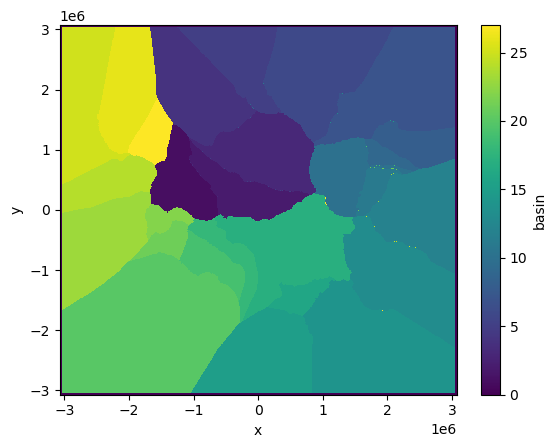

In [4]:
mask = xr.open_dataset(maskPath).basin
x = mask.x
y = mask.y

xs = x - x.mean()
ys = y - y.mean()

mask.coords['x'] = xs
mask.coords['y'] = ys

mask.plot()

In [5]:
slc = GoelzerSLC(thk.thickness, zb.Z_base)
slc

<xarray.DataArray 'slc' (time: 94, y: 768, x: 768)>
array([[[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
...
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ...,
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]]])
Coordinates:
  * time     (time) float64 2.007e+03 2.008e+03 2.009e+03 ... 2.099e+03 2.1e+03
  * x        (x) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
  * y        (y) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06

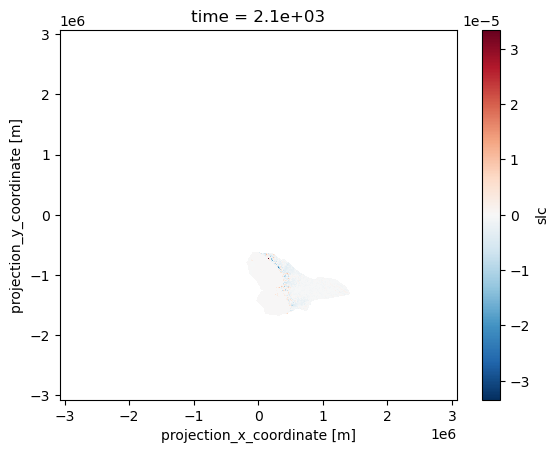

In [44]:
from libs.GoelzerSLC import applyBasinMask

mask = xr.open_dataset(maskPath).basin
test = applyBasinMask(slc, mask, basinID=1)

test.isel(time=-1).plot()

In [7]:
nc = getEnsembleSLC(thkPath, zbPath, maskPath=maskPath)
nc

Thickness                                                    Z_base
combined_2007_2100.nc                                        combined_2007_2100.nc


<xarray.DataArray 'slc' (run: 1, basin: 28, time: 94)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -7.79479943e-05, -1.49807582e-04, ...,
         -4.56206834e-03, -4.64138238e-03, -4.71038376e-03],
        [ 0.00000000e+00, -1.00560300e-04, -1.59912470e-04, ...,
         -5.85273960e-03, -5.94902344e-03, -6.03714741e-03],
        ...,
        [ 0.00000000e+00,  2.29089476e-06,  4.56908998e-06, ...,
          1.57192895e-04,  1.58721115e-04,  1.60092475e-04],
        [ 0.00000000e+00,  5.43068509e-05,  1.19535087e-04, ...,
          2.11810987e-03,  2.13137313e-03,  2.14611184e-03],
        [ 0.00000000e+00, -1.00763856e-05,  4.01965811e-05, ...,
          4.03591331e-04,  3.73288814e-04,  3.70150017e-04]]])
Coordinates:
  * time     (time) float64 2.007e+03 2.008e+03 2.009e+03 ... 2.099e+03 2.1e+03
  * basin    (basin) int64 0 1 2 3 4 5 6 7 8 9 ... 18 19 20 21 22 23 24 25 26 27
  * run      (run) int64 1

In [12]:
slc.isel(time=0).coords

Coordinates:
    time     float64 2.007e+03
  * x        (x) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06
  * y        (y) float64 -3.068e+06 -3.06e+06 -3.052e+06 ... 3.06e+06 3.068e+06

In [45]:
list(mask.coords)

['x', 'y']

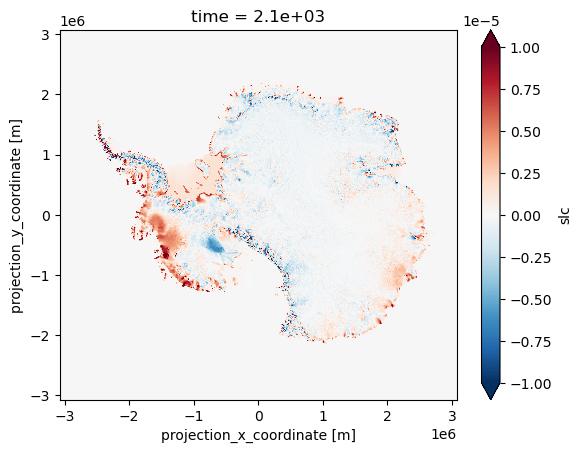

In [34]:
slc.isel(time=-1).plot(vmin=-1e-5, vmax=1e-5, cmap='RdBu_r')